## Letter Recognition through Ensemble Classification<br>Vivek Bhavsar & Chakradhar Thota<br> DePaul University

### Abstract:

Letter Recognition is an important research direction in text mining, natural language processing and information retrieval. It helps us in email filtering, web searching, text recognition, document sorting with topic and to represent text documents in a condensed way etc. In the study, a comprehensive study of comparing base learning algorithms (Decision tree, Naïve Bayes, support vector machines and KNN) with widely applied ensemble methods (AdaBoost, Bagging, Random Forest and Rotation Forest, Heterogeneous) are conducted. The classification schemes are compared in terms of classification performance (Sensitivity, Specificity, Accuracy, Time Complexity) and the best classifier is determined.

## Objective:

The main objective is to run multiple algorithm and perform ensembling models on the optimal parameters to obtain the best classifier which is efficient in every way to correctly classify every single letter.

### Dataset Collection:

We used Letter Recognition data set of UCI Machine Learning Data Repository. 
Link for the dataset: https://archive.ics.uci.edu/ml/datasets/letter+recognition.
The dataset contains 20000 cases of 26 uppercase English letters, using 20 different randomly distorted fonts. Each of these image characters is assigned 16 attributes, which are represented by integers of 0 to 15. 

In [1]:
# Imporing all Packages required for analyzing the data
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
import scikitplot as skplt
from sklearn import feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Loading the Data

In [3]:
letter_data=pd.read_csv("D:/Datasets/letter-recognition.csv",header=None)
letter_data.columns=["Letter","X-box","Y-box","Width of Box","Height of Box","# Pixels","X-Pixels Mean","Y-Pixels Mean","X Variance","Y Variance","XY Correlation","XXY Mean","XYY Mean","X-ege","XegvY","Y-ege","YegvX"]
print("Checking for the Null/Missing values")
print(letter_data.isnull().sum())

Checking for the Null/Missing values
Letter            0
X-box             0
Y-box             0
Width of Box      0
Height of Box     0
# Pixels          0
X-Pixels Mean     0
Y-Pixels Mean     0
X Variance        0
Y Variance        0
XY Correlation    0
XXY Mean          0
XYY Mean          0
X-ege             0
XegvY             0
Y-ege             0
YegvX             0
dtype: int64


The dataset obtained from the above provided link is loaded into the DataFrame(letter) and is checked for the Missing Values. The results shown that the data doesn't have missing values and is in a good state to do further analysis.

In [4]:
letter_data.head()

,Letter,X-box,Y-box,Width of Box,Height of Box,# Pixels,X-Pixels Mean,Y-Pixels Mean,X Variance,Y Variance,XY Correlation,XXY Mean,XYY Mean,X-ege,XegvY,Y-ege,YegvX
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


### Overview of the Statistics of the data

In [5]:
(letter_data.select_dtypes(include='int64')).describe(include="all")

,X-box,Y-box,Width of Box,Height of Box,# Pixels,X-Pixels Mean,Y-Pixels Mean,X Variance,Y Variance,XY Correlation,XXY Mean,XYY Mean,X-ege,XegvY,Y-ege,YegvX
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


### Data PreProcessing

Text(3.8,0.5,'Frequency Count')

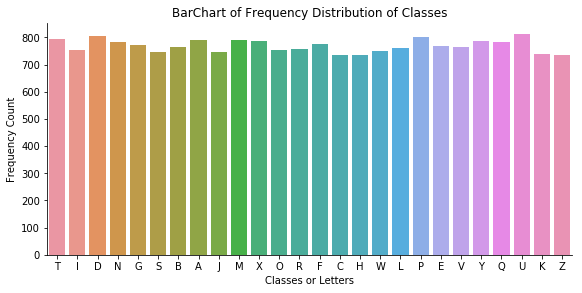

In [6]:
sns.factorplot(x="Letter",data=letter_data,kind="count",aspect=2,size=4)
plt.title("BarChart of Frequency Distribution of Classes")
plt.xlabel("Classes or Letters")
plt.ylabel("Frequency Count")

The Barchart is plotted to check the Frequency distribution of classes. And from that we can see that the frequencies of classes are almost equal and thus making the dataset very well balanced. And also, all of the attributes in the dataset has same value range i.e. 0 to 15. So, the data doesn't need normalization.

In [7]:
target=letter_data.Letter
letter_data=letter_data.drop(["Letter"],axis=1) # The Target attribute from the dataset is separated

###  Visualization of Multi Dimensional Data

Data Visualization is one of the important step in understanding the behaviour of the data as it will give the information about the distribution of classes and the presence of Noise in it. Since the Data is Multi-Dimensional we need to transform the data into lower dimensional space so that the data can be visualised. For this feature extraction technique PCA is used and the Data is transformed into Two-Dimensional space and then Scatterplot is used to plot the data. 

In [8]:
pca = decomposition.PCA(n_components=2)
scaler = StandardScaler()
letter_norm = scaler.fit_transform(letter_data)
letter_pca = pd.DataFrame(pca.fit_transform(letter_norm))
target_np = np.array(target)
letter_pca.columns=["PCA 1","PCA 2"]
target_df=pd.Series(target_np)

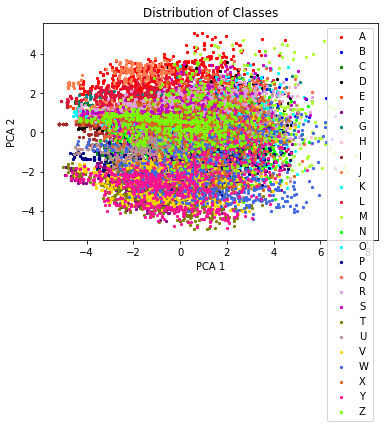

In [9]:
bx=letter_pca[target_df=="A"].plot.scatter(x="PCA 1",y="PCA 2",color='r',s=5,label="A",title="Distribution of Classes")
letter_pca[target_df=="B"].plot.scatter(x="PCA 1",y="PCA 2",color='b',s=5,label="B",ax=bx)
letter_pca[target_df=="C"].plot.scatter(x="PCA 1",y="PCA 2",color='g',s=5,label="C",ax=bx)
letter_pca[target_df=="D"].plot.scatter(x="PCA 1",y="PCA 2",color='black',s=5,label="D",ax=bx)
letter_pca[target_df=="E"].plot.scatter(x="PCA 1",y="PCA 2",color='orangered',s=5,label="E",ax=bx)
letter_pca[target_df=="F"].plot.scatter(x="PCA 1",y="PCA 2",color='Purple',s=5,label="F",ax=bx)
letter_pca[target_df=="G"].plot.scatter(x="PCA 1",y="PCA 2",color='teal',s=5,label="G",ax=bx)
letter_pca[target_df=="H"].plot.scatter(x="PCA 1",y="PCA 2",color='pink',s=5,label="H",ax=bx)
letter_pca[target_df=="I"].plot.scatter(x="PCA 1",y="PCA 2",color='brown',s=5,label="I",ax=bx)
letter_pca[target_df=="J"].plot.scatter(x="PCA 1",y="PCA 2",color='coral',s=5,label="J",ax=bx)
letter_pca[target_df=="K"].plot.scatter(x="PCA 1",y="PCA 2",color='cyan',s=5,label="K",ax=bx)
letter_pca[target_df=="L"].plot.scatter(x="PCA 1",y="PCA 2",color='crimson',s=5,label="L",ax=bx)
letter_pca[target_df=="M"].plot.scatter(x="PCA 1",y="PCA 2",color='greenyellow',s=5,label="M",ax=bx)
letter_pca[target_df=="N"].plot.scatter(x="PCA 1",y="PCA 2",color='lime',s=5,label="N",ax=bx)
letter_pca[target_df=="O"].plot.scatter(x="PCA 1",y="PCA 2",color='aqua',s=5,label="O",ax=bx)
letter_pca[target_df=="P"].plot.scatter(x="PCA 1",y="PCA 2",color='navy',s=5,label="P",ax=bx)
letter_pca[target_df=="Q"].plot.scatter(x="PCA 1",y="PCA 2",color='tomato',s=5,label="Q",ax=bx)
letter_pca[target_df=="R"].plot.scatter(x="PCA 1",y="PCA 2",color='plum',s=5,label="R",ax=bx)
letter_pca[target_df=="S"].plot.scatter(x="PCA 1",y="PCA 2",color='m',s=5,label="S",ax=bx)
letter_pca[target_df=="T"].plot.scatter(x="PCA 1",y="PCA 2",color='olive',s=5,label="T",ax=bx)
letter_pca[target_df=="U"].plot.scatter(x="PCA 1",y="PCA 2",color='rosybrown',s=5,label="U",ax=bx)
letter_pca[target_df=="V"].plot.scatter(x="PCA 1",y="PCA 2",color='gold',s=5,label="V",ax=bx)
letter_pca[target_df=="W"].plot.scatter(x="PCA 1",y="PCA 2",color='royalblue',s=5,label="W",ax=bx)
letter_pca[target_df=="X"].plot.scatter(x="PCA 1",y="PCA 2",color='chocolate',s=5,label="X",ax=bx)
letter_pca[target_df=="Y"].plot.scatter(x="PCA 1",y="PCA 2",color='deeppink',s=5,label="Y",ax=bx)
letter_pca[target_df=="Z"].plot.scatter(x="PCA 1",y="PCA 2",color='lawngreen',s=5,label="Z",ax=bx)

From the above scatterplot we can see that there is a fairly good enough separation between the classes. Although Some classes overlaps with the nearest identical classes, it is not distributed all over the plot. So we can expect good results will be obtained from Supervised Learning techniques.

## Methodology:

There are three steps in our Methodology to train the best Model to correctly classify the Letters:

1) Hyper Parameter tuning (Finding the Best parameters) of the Model.

In the First step Models built with various Classification Algorithms will be examined with various parameters and the optimal parameter configuration is determined. Decision Tree, Naive Bayes, KNN, Linear and Non-Linear SVM are the algorithms to be used for training the Classifier and the best parameters will be found.

2) Ensembling the Models to improve the Model Performance of Weak Learners.

In the second step Multiple Models will be Ensembled to effectively improve the performance of weak learners. Independent(Bagging, Random Forest, Rotation Forest) and Dependent(Adaboost) ensembling approaches will be used to obtain the best combination hypothesis.

3) Best classifier which is efficient in every manner is determined.

Paired T-tests will be performed on the results of all Classifiers obtained after these two steps to test the Statistical significant difference between them. The models will be compared with respect to Time Complexity and Performance on every class label and the Hypothesis which is efficient in both manners is determined as the best Classifier.

Note : Mean Accuracy/Error rate derived from the classifier built with different parameter configuration is considered as the parameter for the classifier Performance. The reason for considering the Mean performance as the parameter is, if the Test data is fixed by splitting only once then selecting the best parameter configuration of the classifier is highly dependent on the Test Dataset. So, inorder to overcome this problem the Mean performance of the classifier validated with Multiple Test datasets is considered. So, Cross validation is done on the Train datset to calculate mean Accuracy/Error rate. The idea behind doing many iterations is, if the sample of size N is drawn randomly from the Population for many times then the Mean of all Sample means will get closer to the Population mean.

### Splitting the Data into Train and Test Datasets

In [10]:
letter_train, letter_test, target_train, target_test = train_test_split(letter_data,target,train_size=0.67,stratify=target)

## 1)Hyper Parameter tuning (Finding the Best/Optimal parameters) of the Model.

In [11]:
def error_plots(clf_report,Algorithm):
    
    if Algorithm == "Decision Tree":
        Parent_cases=np.array(clf_report[clf_report["Criterion"]=="gini"]["Min_Cases in parent"]).astype(np.float)
        Gini_train_err=np.array(clf_report[clf_report["Criterion"]=="gini"]["KFold_Train_Errorrate"]).astype(np.float)
        Gini_test_err=np.array(clf_report[clf_report["Criterion"]=="gini"]["KFold_Test_Errorrate"]).astype(np.float)
        Entropy_train_err=np.array(clf_report[clf_report["Criterion"]=="entropy"]["KFold_Train_Errorrate"]).astype(np.float)
        Entropy_test_err=np.array(clf_report[clf_report["Criterion"]=="entropy"]["KFold_Test_Errorrate"]).astype(np.float)
        
        plt.plot(Parent_cases,Gini_train_err,color='red', marker='.', linewidth=2, markersize=12)
        plt.plot(Parent_cases,Gini_test_err,color='blue', marker='.', linewidth=2, markersize=12)
        plt.plot(Parent_cases,Entropy_train_err,color='yellow', marker='.', linewidth=2, markersize=12)
        plt.plot(Parent_cases,Entropy_test_err,color='green', marker='.', linewidth=2, markersize=12)
        plt.legend(("Gini KFold Train Error","Gini KFold Test Error","Entropy KFold Train Error","Entropy KFold Test Error"))
        plt.xlabel("Min_cases in Parent")

    if Algorithm == "KNN":
        plt.plot(knn_clf_report["No.of Neighbours"],clf_report["KFold_Train_Errorrate"],color='green', marker='.', linewidth=2, markersize=12)
        plt.plot(knn_clf_report["No.of Neighbours"],clf_report["KFold_Test_Errorrate"],color='red', marker='.', linewidth=2, markersize=12)
        plt.legend(("KFold Train Error Rate","KFold Test Error Rate"))
        plt.xlabel("No.of Neighbours")
    
    plt.ylabel("Error Rate")
    plt.title(Algorithm +" Performance on the KFold Train dataset with vaious Parameters Configuration") 
    

The above function is defined for plotting the Errorplots for Decision tree and KNN Classifiers.

### Decision tree

In [12]:
def DT_get_clfreport(clf,param_config):
    trees=np.array([[" ",0,0,0,0,0]])
    criteria=["gini","entropy"]
    skf = StratifiedKFold(n_splits=10,shuffle = True)
    for method in criteria:
        for num_parent in param_config:
            num_child=num_parent/2
            train_err_list=[]
            test_err_list=[]
            complexity_list=[]
            for train,test in skf.split(letter_train,target_train):
                clf.set_params(**{"criterion":method,"min_samples_split":int(num_parent),"min_samples_leaf":int(num_child)})
                clf.fit(letter_train.iloc[train,:],target_train.iloc[train])
                train_err_list.append(1-(round(clf.score(letter_train.iloc[train,:],target_train.iloc[train]),2)))
                test_err_list.append(1-(round(clf.score(letter_train.iloc[test,:],target_train.iloc[test]),2)))
                complexity_list.append(clf.tree_.node_count)
            temp=np.array([[method,int(num_parent),int(num_child),round(np.mean(train_err_list),2),round(np.mean(test_err_list),2),round(np.mean(complexity_list))]])
            trees=np.append(trees,temp,0)
    DT_clf_report=pd.DataFrame(trees[1:,:],columns=['Criterion','Min_Cases in parent','Min_Cases in Child','KFold_Train_Errorrate','KFold_Test_Errorrate','Complexity'])
    return DT_clf_report

In [13]:
%%time
start=round(math.sqrt(0.67*letter_train.shape[0]))
cases_parent=np.linspace(15,start+10,12,dtype=int)
DT_clf_report=DT_get_clfreport(tree.DecisionTreeClassifier(),cases_parent)

Wall time: 20.6 s


In [14]:
DT_clf_report

,Criterion,Min_Cases in parent,Min_Cases in Child,KFold_Train_Errorrate,KFold_Test_Errorrate,Complexity
0,gini,15,7,0.13,0.19,1316.0
1,gini,23,11,0.17,0.21,981.0
2,gini,31,15,0.19,0.23,782.0
3,gini,39,19,0.22,0.25,651.0
4,gini,47,23,0.24,0.27,561.0
5,gini,55,27,0.25,0.28,500.0
6,gini,64,32,0.27,0.3,445.0
7,gini,72,36,0.28,0.31,411.0
8,gini,80,40,0.29,0.31,385.0
9,gini,88,44,0.3,0.32,361.0


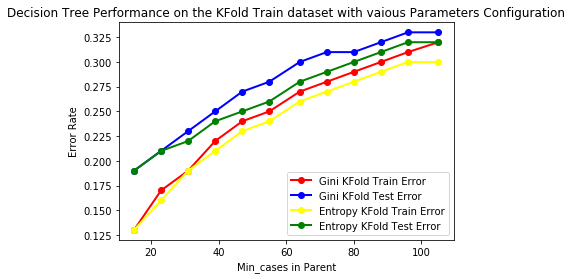

In [15]:
error_plots(DT_clf_report,"Decision Tree")

As a part of hyper Parameter tuning for Decision Tree, Information criteria and Min Samples required in the parent node to split are changed at every step and the classifier/Model Error rate is calculated. The errorrates obtained for different parameter values are plotted as a graph and elbow analysis is carried out to find the elbow point where beyond a critical point the performance of the classifier doesn't improve significantly. Along with this elbow analysis, complexity of a Decision Tree(No.of Terminal Nodes/ rules) is also considered so that the Decision Tree with optimal Parameters doesn't have overfitting with many rules of classification. For the Decision Tree the elbow point is found at Criterion=Entropy, Cases in Parent =31 and is determined as the optimal parameter configuration.

### Naive Bayes

In [16]:
def pc_data(train,test):
    min_max_scaler = preprocessing.MinMaxScaler().fit(train)
    test_norm=min_max_scaler.transform(test)
    train_norm=min_max_scaler.transform(train)
    pca = decomposition.PCA()
    pc = pca.fit(train_norm)
    train_pc=pc.transform(train_norm)
    test_pc=pc.transform(test_norm)
    return train_pc,test_pc

In [17]:
def naivebayes_get_clfreport():
    train_acc_list=[]
    test_acc_list=[]
    clf=naive_bayes.GaussianNB()
    skf = StratifiedKFold(n_splits=10,shuffle = True)
    for train,test in skf.split(letter_train,target_train):
        clf.fit(letter_train.iloc[train,:],target_train.iloc[train])
        train_acc_list.append(round(clf.score(letter_train.iloc[train,:],target_train.iloc[train]),2))
        test_acc_list.append(round(clf.score(letter_train.iloc[test,:],target_train.iloc[test]),2))
    
    print("Naive Bayes Performance on the Raw Data")    
    print("Train Accuracy : ",round(np.mean(train_acc_list),2))
    print("Test Accuracy : ",round(np.mean(test_acc_list),2))

In [18]:
%%time
naivebayes_get_clfreport()

Naive Bayes Performance on the Raw Data
Train Accuracy :  0.65
Test Accuracy :  0.64
Wall time: 1.39 s


The assumption of Naive bayes over the dataset is that the predictors are independent of each other. So, Inorder to meet this requirement, PCA is applied on the dataset so that the linear relationship between the attributes doesn't exist. For Naive Bayes, no parameter values are changed as a part of hyper Parameter tuning. This results in considering only one Mean Train and Test Accuracy with the default Model function.

### KNN

In [19]:
%%time
param = [{'n_neighbors':list(np.linspace(1,19,10,dtype=int)[::-1])}]
clf = GridSearchCV(neighbors.KNeighborsClassifier(),param,cv=10,scoring='accuracy')
clf.fit(letter_train,target_train)
knn_clf_report=pd.DataFrame({"No.of Neighbours":clf.cv_results_['param_n_neighbors'],"KFold_Train_Errorrate":clf.cv_results_['mean_train_score'],"KFold_Test_Errorrate":clf.cv_results_['mean_test_score']})

Wall time: 3min 33s


In [20]:
knn_clf_report.KFold_Train_Errorrate = round((1-knn_clf_report.KFold_Train_Errorrate),2)
knn_clf_report.KFold_Test_Errorrate = round((1-knn_clf_report.KFold_Test_Errorrate),2)
knn_clf_report

,KFold_Test_Errorrate,KFold_Train_Errorrate,No.of Neighbours
0,0.08,0.06,19
1,0.08,0.06,17
2,0.07,0.05,15
3,0.07,0.05,13
4,0.07,0.05,11
5,0.06,0.04,9
6,0.06,0.04,7
7,0.06,0.03,5
8,0.05,0.02,3
9,0.05,0.00,1


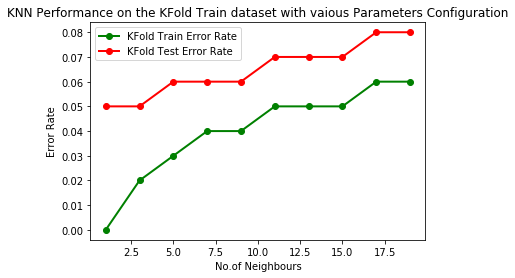

In [21]:
error_plots(knn_clf_report,"KNN")

K Nearest Neighbours algorithm is validated with different number of neighbours to be considered to classify the instance. The Errorrates of Train and Test dataset are obtained at each K value and the graph is plotted. Elbow analysis is done on the plot and K=7 is determined as the optimal parameter.

### SVM

In [22]:
def svm_error_plots(clf_report,algorithm):
    
    if algorithm == "Linear SVM":
        
        plt.plot(clf_report["C_values"],clf_report["KFold_Train_Errorrate"],marker='.',linewidth=2, markersize=12)
        plt.plot(clf_report["C_values"],clf_report["KFold_Test_Errorrate"],marker='.',linewidth=2, markersize=12)
        plt.legend(("KFold Train Error","KFold Test Error"))
        plt.title("Error Rate of "+ algorithm +" on the KFold Train dataset with various C values")
        plt.xlabel("C_Values")
        plt.ylabel("Error rate")
    
    if algorithm == "RBF SVM" or algorithm == "Poly SVM":
        
        if algorithm == "RBF SVM":
            train_data=clf_report.pivot_table(index="C_values", columns="Gamma_values",values="KFold_Train_Accuracy")
            test_data=clf_report.pivot_table(index="C_values", columns="Gamma_values",values="KFold_Test_Accuracy")
            train_title = "Effect of C and Gamma values on KFold Train Accuracy for "+ algorithm
            test_title = "Effect of C and Gamma values on KFold Test Accuracy for "+ algorithm            
        elif algorithm == "Poly SVM":
            train_data=clf_report.pivot_table(index=["C_values","Degree"], columns="Gamma_values",values="KFold_Train_Accuracy")
            test_data=clf_report.pivot_table(index=["C_values","Degree"], columns="Gamma_values",values="KFold_Test_Accuracy")
            train_title = "Effect of Degree,C and Gamma values on KFold Train Accuracy for "+ algorithm
            test_title = "Effect of Degree,C and Gamma values on KFold Test Accuracy for "+ algorithm
        
    
        sns.heatmap(train_data,cmap="Blues",annot=True)
        plt.title(train_title)
        plt.show()
        sns.heatmap(test_data,cmap="Blues",annot=True)
        plt.title(test_title)
        plt.show()
        plt.tight_layout()
    

The above function is defined to get the errorplots of the SVM. For Linear SVM, errorplot pattern is same as we used for Decision TRee and KNN. But for the Non-Linear SVM, Heat maps are used to analyze the performance as we are considering more than one parameter to change as a part of Hyper Parameter tuning.

### Linear SVM

In [23]:
%%time
C_values=np.linspace(0.0001,0.1,20)
param = [{'C':list(C_values)}]
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr',kernel='linear'),param,cv=10,scoring='accuracy')
clf.fit(letter_train,target_train)
linear_svm_clfreport=pd.DataFrame({"C_values":clf.cv_results_['param_C'],"KFold_Train_Errorrate":clf.cv_results_['mean_train_score'],"KFold_Test_Errorrate":clf.cv_results_['mean_test_score']})

Wall time: 20min 40s


In [24]:
linear_svm_clfreport.KFold_Train_Errorrate = round((1-linear_svm_clfreport.KFold_Train_Errorrate),2)
linear_svm_clfreport.KFold_Test_Errorrate = round((1-linear_svm_clfreport.KFold_Test_Errorrate),2)
linear_svm_clfreport

,C_values,KFold_Test_Errorrate,KFold_Train_Errorrate
0,0.0001,0.51,0.50
1,0.00535789,0.18,0.17
2,0.0106158,0.17,0.16
3,0.0158737,0.16,0.15
4,0.0211316,0.16,0.15
5,0.0263895,0.16,0.15
6,0.0316474,0.16,0.14
7,0.0369053,0.16,0.14
8,0.0421632,0.15,0.14
9,0.0474211,0.15,0.14


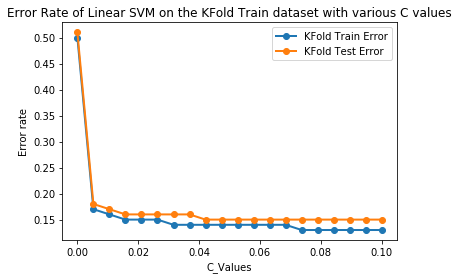

In [25]:
svm_error_plots(linear_svm_clfreport,"Linear SVM")

For the Linear SVM, Models are validated with various C values which determines the Soft Margin for the Hyper Parameter tuning. Elbow analysis is done on the errorplot and C=0.01 is determined as the optimal parameter.

### Kernel SVM

#### Now in the Non-Linear SVM the input space is transformed into higher dimensional space to increase the linear separability between the classes.

### RBF/Guassian SVM

In [26]:
%%time
C_values=np.round(np.linspace(0.0001,0.1,5),5)
gamma_values=np.round(np.linspace(0.0001,0.005,5),5)
param = [{'C':list(C_values),'gamma':list(gamma_values)}]
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr',kernel='rbf'),param,cv=10,scoring='accuracy')
clf.fit(letter_train,target_train)
RBF_clf_report=pd.DataFrame({"C_values":clf.cv_results_['param_C'],"Gamma_values":clf.cv_results_['param_gamma'],"KFold_Train_Accuracy":clf.cv_results_['mean_train_score'],"KFold_Test_Accuracy":clf.cv_results_['mean_test_score']})

Wall time: 1h 21min 16s


In [27]:
RBF_clf_report

,C_values,Gamma_values,KFold_Test_Accuracy,KFold_Train_Accuracy
0,0.0001,0.0001,0.040672,0.040672
1,0.0001,0.00132,0.040672,0.040672
2,0.0001,0.00255,0.040672,0.040672
3,0.0001,0.00377,0.040672,0.040672
4,0.0001,0.005,0.040672,0.040672
5,0.02508,0.0001,0.040672,0.040672
6,0.02508,0.00132,0.354627,0.356087
7,0.02508,0.00255,0.504851,0.508549
8,0.02508,0.00377,0.576119,0.581127
9,0.02508,0.005,0.616418,0.621915


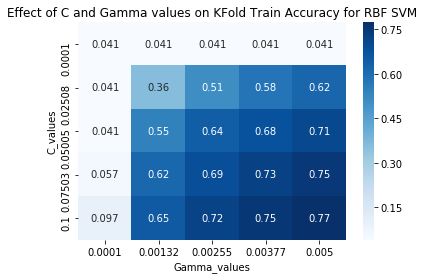

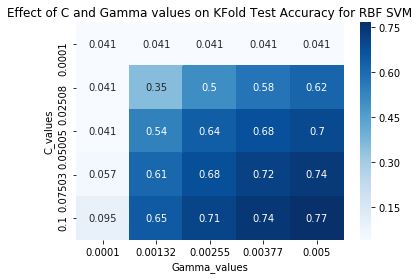

<Figure size 432x288 with 0 Axes>

In [28]:
svm_error_plots(RBF_clf_report,"RBF SVM")

For the RBF/Guassian SVM, Models are validated with the Combination of various C and Gamma values which determines the Softness of the margin and the spread of the points/instances with in the circle respectively. Elbow analysis is done on the HeatMap and C=0.1, Gamma=0.00377 is determined as the optimal parameter.

### Poly SVM

In [29]:
%%time
Degree_vals=np.linspace(1,5,5,dtype=int)
C_values=np.round(np.linspace(0.0001,0.1,5),5)
gamma_values=np.round(np.linspace(0.0001,0.005,5),5)
param = [{'C':list(C_values),'gamma':list(gamma_values),'degree':list(Degree_vals)}]
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr',kernel='poly'),param,cv=10,scoring='accuracy')
clf.fit(letter_train,target_train)
Poly_clf_report=pd.DataFrame({"C_values":clf.cv_results_['param_C'],"Gamma_values":clf.cv_results_['param_gamma'],"Degree":clf.cv_results_['param_degree'],"KFold_Train_Accuracy":clf.cv_results_['mean_train_score'],"KFold_Test_Accuracy":clf.cv_results_['mean_test_score']})

Wall time: 4h 18min 12s


In [30]:
Poly_clf_report

,C_values,Degree,Gamma_values,KFold_Test_Accuracy,KFold_Train_Accuracy
0,0.0001,1,0.0001,0.040672,0.040672
1,0.0001,1,0.00132,0.040672,0.040672
2,0.0001,1,0.00255,0.040672,0.040672
3,0.0001,1,0.00377,0.040672,0.040672
4,0.0001,1,0.005,0.040672,0.040672
5,0.0001,2,0.0001,0.040672,0.040672
6,0.0001,2,0.00132,0.040672,0.040672
7,0.0001,2,0.00255,0.040672,0.040672
8,0.0001,2,0.00377,0.040672,0.040672
9,0.0001,2,0.005,0.040672,0.040672


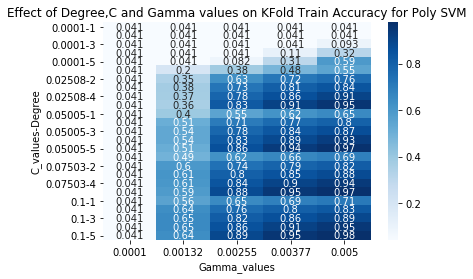

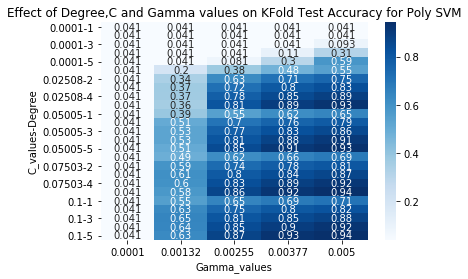

<Figure size 432x288 with 0 Axes>

In [31]:
svm_error_plots(Poly_clf_report,"Poly SVM")

For the Poly SVM, Models are validated with the Combination of various C,Gamma values along with Degree for the Hyper Parameter tuning. Elbow analysis is done on the Heatmap and C=0.05, Gamma=0.005, Degree=4 is determined as the optimal parameter.

## Optimal Parameter Configuration of various Algorithms

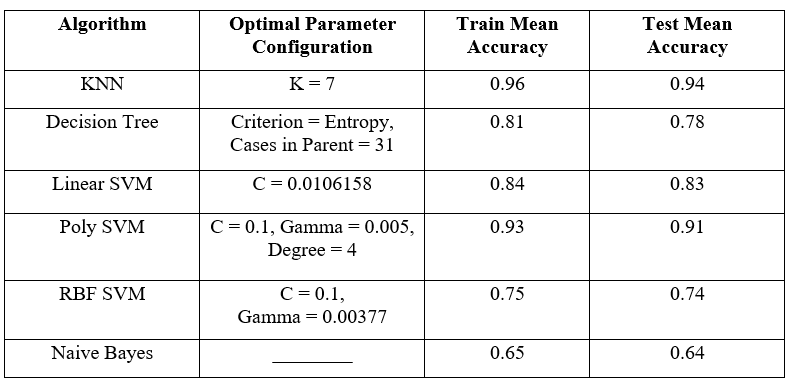

In [32]:
from IPython.display import Image
Image(filename='D:/Optimal_Parameters.png', width=700)

From the above table we can see that the KNN and Poly SVM performs better than the rest of Algorithms on both Train and Test datasets with more than 90% of Accuracy. On the other hand Decision Tree, Linear SVM has a overall decent performance and Naive Bayes, RBF SVM performs poorly. Since KNN and SVM are the lazy learners, we can't conclude either of them as the best classifiers. So we want to check the possibility of enhancing the performance of the Classifiers which doesn't take more time to train the model. Hence the Ensembled techniques will be performed on the Classifiers built with algorithms like Decision Tree, Naive Bayes and Linear SVM hoping to match the performance of the KNN and Poly SVM.

## 2) Ensembled Learning

In [33]:
def get_ensemble_report(classifier,param,num_folds):
    clf = GridSearchCV(classifier,param,cv=num_folds,scoring='accuracy')
    clf.fit(letter_train,target_train)
    ensemble_report=pd.DataFrame({"Estimators":clf.cv_results_['param_n_estimators'],"KFold_Train_Errorrate":clf.cv_results_['mean_train_score'],"KFold_Test_Errorrate":clf.cv_results_['mean_test_score']})
    ensemble_report.KFold_Train_Errorrate = (1-ensemble_report.KFold_Train_Errorrate)
    ensemble_report.KFold_Test_Errorrate = (1-ensemble_report.KFold_Test_Errorrate)
    return ensemble_report

In [34]:
def get_error_plots(ensemble_report,algorithm):
    
    plt.title(algorithm+" ensemble classification error rate with various No.of estimators on KFold Train Dataset")
    plt.plot(ensemble_report["Estimators"],ensemble_report["KFold_Train_Errorrate"],marker='.',linewidth=2, markersize=12)
    plt.plot(ensemble_report["Estimators"],ensemble_report["KFold_Test_Errorrate"],marker='.',linewidth=2, markersize=12)
    plt.xlabel("No.of Estimators")
    plt.ylabel("Error Rate")
    plt.legend(("KFold Train Error Rate","KFold Test Error Rate"))

The above function is defined to visualize the errorplots with respective to the no.of estimators. For the Naive Bayes and Rotation Forest new features are extracted by applying PCA to the data. For Naive Bayes PCA is applied to make the features independent to each other. Where as for Rotation Forest PCA is applied to induce more randomness in the data which will enchance the efficiency in combining many Hypothesis/Estimators.

## Homogeneous Ensembled Learning

## Decision Tree

### i) Bagging

In [35]:
%%time
d_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=31,min_samples_leaf=15)
estimators = np.linspace(1,51,26,dtype=int)
param = [{'n_estimators':list(estimators)}]
Bagging_DT_ensemble_report = get_ensemble_report(BaggingClassifier(base_estimator=d_tree,max_samples=1.0,max_features=1.0),param,10)

Wall time: 4min 22s


In [36]:
Bagging_DT_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.269851,0.242838
1,3,0.207687,0.173938
2,5,0.193955,0.157670
3,7,0.189776,0.150727
4,9,0.184030,0.144203
5,11,0.181567,0.143240
6,13,0.177537,0.140813
7,15,0.176418,0.138338
8,17,0.178657,0.137528
9,19,0.173134,0.137072


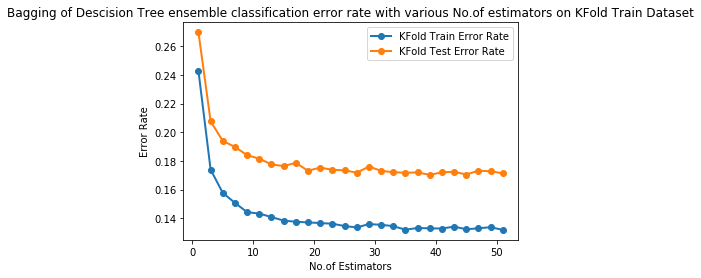

In [37]:
get_error_plots(Bagging_DT_ensemble_report,"Bagging of Descision Tree")

Bagging is an Independent Ensembled technique where the Classifiers performance is not effected by the previous cassifiers outcome. It is used as a way to reduce the variance of a base estimator (Decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. Randomness in the Classifiers/estimators is induced by creating distinct Training samples for each estimator so that new rules will be generated for different datasets. The mode of all classes classified by the estimators will be considered as the final label of that instance. In this case No.of estimators are varied at every iteration and the Mean Error rates are calculated. A graph is plotted with Errorrate with respect to the No.of estimators is visualised so that the optimal no.of estimators is determined by using Elbow analysis. For Decision Tree the Elbow analysis determines 9 as the optimal no.of estimators.

### ii) Random Forest

In [38]:
%%time
estimators = np.linspace(1,51,26,dtype=int)
param = [{'n_estimators':list(estimators)}]
RF_ensemble_report = get_ensemble_report(RandomForestClassifier(criterion='entropy',min_samples_split=31,min_samples_leaf=15),param,10)

Wall time: 1min 48s


In [39]:
RF_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.328955,0.302525
1,3,0.215224,0.178126
2,5,0.181045,0.138813
3,7,0.163582,0.122935
4,9,0.153507,0.110249
5,11,0.145821,0.104022
6,13,0.141119,0.098408
7,15,0.139403,0.096733
8,17,0.133955,0.092795
9,19,0.130448,0.088798


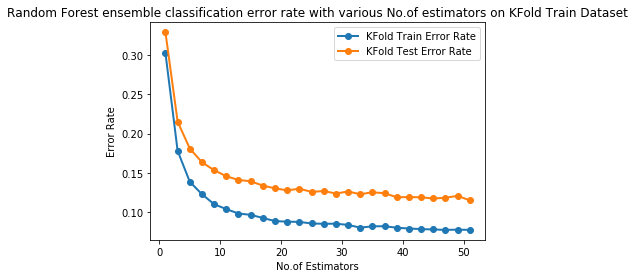

In [40]:
get_error_plots(RF_ensemble_report,"Random Forest")

Random Forest is another type of Ensembling approach which is more similar to Bagging at implementation. The distinct feature of Random Forest over Bagging is that instead of considering entire attributes at evey splitting of the Paraent node, Random Forest will genrate random subset of features and the Parent node splitting will be done based on the subset. Thus by considering different subset at every split Randomness is induced more and the perfromance of the weak learner is increased. By doing Elbow analysis on the Error rate 11 estimators are optimal for Random Forest.

### iii) Rotation Forest

In [41]:
%%time
min_max_scaler = preprocessing.MinMaxScaler().fit(letter_train)
train_norm = min_max_scaler.transform(letter_train)
pca = decomposition.PCA().fit(train_norm)
letter_train_pc = pca.transform(train_norm)

estimators = np.linspace(1,51,26,dtype=int)
param = [{'n_estimators':list(estimators)}]
clf = GridSearchCV(RandomForestClassifier(criterion='entropy',min_samples_split=31,min_samples_leaf=15),param,cv=10,scoring='accuracy')
clf.fit(letter_train_pc,target_train)
Rotation_ensemble_report=pd.DataFrame({"Estimators":clf.cv_results_['param_n_estimators'],"KFold_Train_Errorrate":clf.cv_results_['mean_train_score'],"KFold_Test_Errorrate":clf.cv_results_['mean_test_score']})

Wall time: 20min 21s


In [42]:
Rotation_ensemble_report.KFold_Train_Errorrate = round((1-Rotation_ensemble_report.KFold_Train_Errorrate),2)
Rotation_ensemble_report.KFold_Test_Errorrate = round((1-Rotation_ensemble_report.KFold_Test_Errorrate),2)
Rotation_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.41,0.36
1,3,0.26,0.19
2,5,0.22,0.15
3,7,0.19,0.12
4,9,0.18,0.11
5,11,0.17,0.10
6,13,0.17,0.10
7,15,0.16,0.09
8,17,0.16,0.09
9,19,0.15,0.09


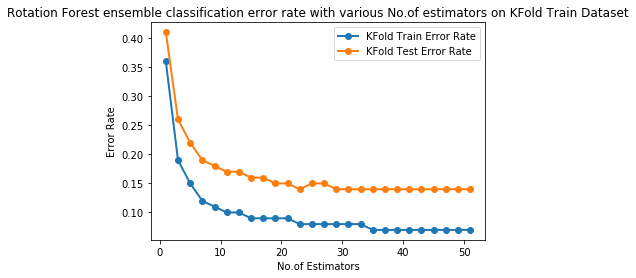

In [43]:
get_error_plots(Rotation_ensemble_report,"Rotation Forest")

Rotation Forest is a another type of Random Forest where randomness in the training datasets can be increased even more by rotating/transforming the attributes into new dimensions. To rotate the attributes PCA is applied on the data and random subset of features are considered at every parent node split as in the case of Random Forest. So the Random Forest is used as the estimator for Rotation Forest but the Data will be rotated before training the model. Mean Error rates were calculated at every iteration and the Elbow analysis determines 11 as the optimal parameter.

### iv) Adaboost

In [44]:
%%time
d_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=31,min_samples_leaf=15)
estimators = np.linspace(1,51,26,dtype=int)
param = [{'n_estimators':list(estimators)}]
Ada_DT_ensemble_report = get_ensemble_report(AdaBoostClassifier(base_estimator=d_tree),param,10)

Wall time: 11min 27s


In [45]:
Ada_DT_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.224478,0.189179
1,3,0.152612,0.045931
2,5,0.115448,0.014279
3,7,0.098284,0.006410
4,9,0.081716,0.003930
5,11,0.077910,0.002438
6,13,0.073134,0.001940
7,15,0.067388,0.001277
8,17,0.064776,0.000945
9,19,0.063582,0.000755


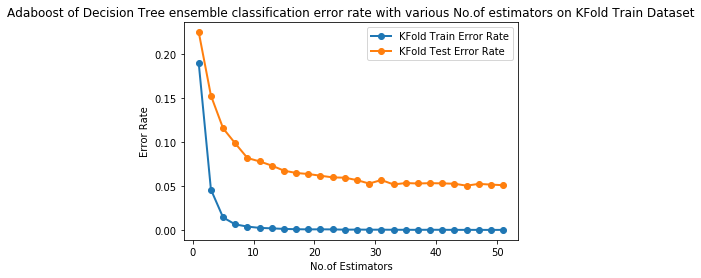

In [46]:
get_error_plots(Ada_DT_ensemble_report,"Adaboost of Decision Tree")

Adaboost is a Dependent Ensembled technique where the classifier performance is dependent on the previous classifiers. This is achieved by providing weights to the instances so that the hard instances will be classified correctly. Initially all instances will be weighed equally and a classifier will be trained. After first iteration the weights of instances will be updated in such a way that the misclassified instances will be given more weight and in the second iteration a classifier is trained on the instances with updated weight and the same procedure will be carried out for next iterations. Because of these updated weights the chance of misclassification of hard instances will be reduced which results in improving the classifier accuracy at every iteration. In this case the Decision tree is validated with different no.of classifiers/estimators and the errorplot is obtained. Elbow analysis on this graph results the 13 classifiers are the optimal number of the estimators.

## Naive Bayes

Initial Analysis in finding the optimal parameter configuration shows that Naive Bayes doesn't perform well with respect to other classifiers.  Since it takes very less time to train the classifier, Ensembling methods are also appllied to Naive Bayes Classifier hoping that it will significantly increase the performance.

### i) Bagging

In [47]:
%%time
estimators = np.linspace(1,51,26,dtype=int)
param = [{'n_estimators':list(estimators)}]
clf = GridSearchCV(BaggingClassifier(base_estimator = naive_bayes.GaussianNB(),max_samples=1.0,max_features=1.0),param,cv=10,scoring='accuracy')
clf.fit(letter_train_pc,target_train)
Naive_ensemble_report=pd.DataFrame({"Estimators":clf.cv_results_['param_n_estimators'],"KFold_Train_Errorrate":clf.cv_results_['mean_train_score'],"KFold_Test_Errorrate":clf.cv_results_['mean_test_score']})

Wall time: 11min 13s


In [48]:
Naive_ensemble_report.KFold_Train_Errorrate = (1-Naive_ensemble_report.KFold_Train_Errorrate)
Naive_ensemble_report.KFold_Test_Errorrate = (1-Naive_ensemble_report.KFold_Test_Errorrate)
Naive_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.311269,0.307555
1,3,0.307985,0.304818
2,5,0.310299,0.304171
3,7,0.309478,0.303251
4,9,0.310373,0.303715
5,11,0.308731,0.302994
6,13,0.310299,0.303906
7,15,0.309104,0.303259
8,17,0.307910,0.303748
9,19,0.308060,0.303466


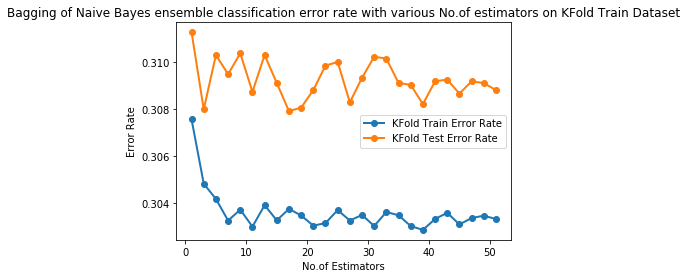

In [49]:
get_error_plots(Naive_ensemble_report,"Bagging of Naive Bayes")

Independent Ensembling method Bagging is implemented with Naive Bayes as the base estimator and the model performance is analyzed with different no.of estimators. Mean Error rates were calculated at each iteraton and Error graph is plotted to visulaize the performance. And the results shows that the performance of the Naive Bayes is constant and even the Ensembling multiple models didn't improve the performance. So only 1 estimator can be considered as the optimal parameter in this case.

### ii) Adaboost

In [50]:
%%time
estimators = np.linspace(1,51,26,dtype=int)
param = [{'n_estimators':list(estimators)}]
clf = GridSearchCV(AdaBoostClassifier(base_estimator=naive_bayes.GaussianNB()),param,cv=10,scoring='accuracy')
clf.fit(letter_train_pc,target_train)
Ada_Naive_ensemble_report=pd.DataFrame({"Estimators":clf.cv_results_['param_n_estimators'],"KFold_Train_Errorrate":clf.cv_results_['mean_train_score'],"KFold_Test_Errorrate":clf.cv_results_['mean_test_score']})

Wall time: 28min 58s


In [51]:
Ada_Naive_ensemble_report.KFold_Train_Errorrate = round((1-Ada_Naive_ensemble_report.KFold_Train_Errorrate),2)
Ada_Naive_ensemble_report.KFold_Test_Errorrate = round((1-Ada_Naive_ensemble_report.KFold_Test_Errorrate),2)
Ada_Naive_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.31,0.30
1,3,0.77,0.76
2,5,0.70,0.69
3,7,0.69,0.69
4,9,0.65,0.65
5,11,0.62,0.61
6,13,0.61,0.60
7,15,0.58,0.57
8,17,0.56,0.55
9,19,0.54,0.53


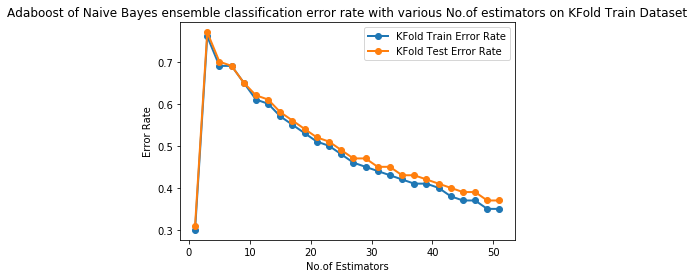

In [52]:
get_error_plots(Ada_Naive_ensemble_report,"Adaboost of Naive Bayes")

Dependent Ensembling method Adaboost is implemented with Naive Bayes as the base estimator and the model performance is analyzed with different no.of estimators. Mean Error rates were calculated at each iteraton and Error graph is plotted to visulaize the performance. And the results shows that initially the performance of the Naive Bayes deteriorates when weights are given to the instances indicates that default classifier with no weights performs better. Even though after many iterations the performance of Weighted classifiers matches the initial performance it is efficient to consider the classifier with no weights as it will take less time to train and also it has less complexity to implement.

## SVM

### i) Bagging

In [53]:
%%time
estimators = np.linspace(1,51,26,dtype=int)
param = [{'n_estimators':list(estimators)}]
linear_svm = svm.SVC(decision_function_shape='ovr',kernel='linear',C=0.0106158)
svm_ensemble_report=get_ensemble_report(BaggingClassifier(base_estimator=linear_svm),param,5)

Wall time: 3h 7min 50s


In [54]:
svm_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.172985,0.162744
1,3,0.170149,0.160150
2,5,0.169776,0.157892
3,7,0.167687,0.157146
4,9,0.169403,0.156903
5,11,0.166791,0.157090
6,13,0.166642,0.155654
7,15,0.166716,0.155989
8,17,0.165896,0.155560
9,19,0.168284,0.155374


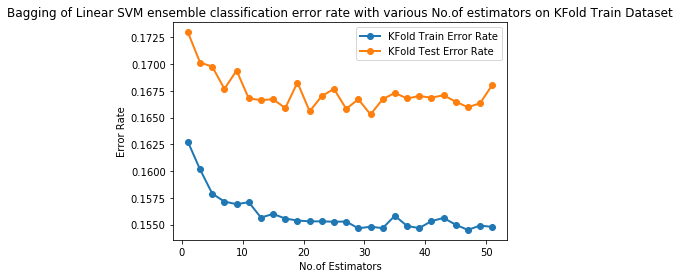

In [55]:
get_error_plots(svm_ensemble_report,"Bagging of Linear SVM")

Independent Ensembling method Bagging is implemented with Linear SVM as the base estimator and the model performance is analyzed with different no.of estimators. Mean Error rates were calculated at each iteraton and Error graph is plotted to visulaize the performance. And the results shows that the performance of the Linear SVM is not improved even after Ensembling multiple models. So only 1 estimator can be considered as the optimal parameter in this case.

### ii) Adaboost

In [56]:
%%time
estimators = np.linspace(1,25,13,dtype=int)
param = [{'n_estimators':list(estimators)}]
linear_svm = svm.SVC(decision_function_shape='ovr',kernel='linear',C=0.0106158)
svm_ada_ensemble_report=get_ensemble_report(AdaBoostClassifier(base_estimator=linear_svm,algorithm='SAMME'),param,5)

Wall time: 4h 32min 1s


In [57]:
svm_ada_ensemble_report

,Estimators,KFold_Test_Errorrate,KFold_Train_Errorrate
0,1,0.959328,0.959328
1,3,0.952836,0.952988
2,5,0.952836,0.952988
3,7,0.926716,0.926941
4,9,0.922090,0.921940
5,11,0.922090,0.921940
6,13,0.922090,0.921940
7,15,0.923955,0.923525
8,17,0.923955,0.923525
9,19,0.923955,0.923525


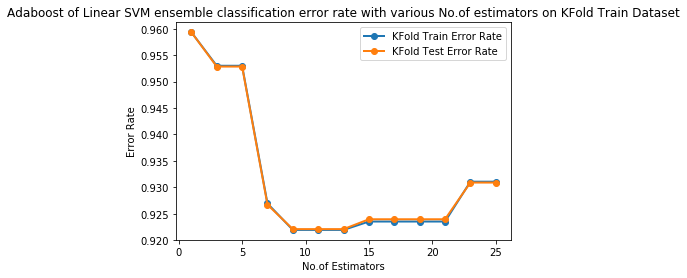

In [58]:
get_error_plots(svm_ada_ensemble_report,"Adaboost of Linear SVM")

Dependent Ensembling method Adaboost is implemented with Linear SVM as the base estimator and the model performance is analyzed with different no.of estimators. Mean Error rates were calculated at each iteraton and Error graph is plotted to visulaize the performance. And the results shows that the peformance of Linear SVM deteriorates when weights are given to the instances indicates that default classifier with no weights performs better. The performance of Adaboost Linear SVM is very poor through out the implementation so we can exclude the Adaboost SVM in the set of calssifiers where we determine the best hypothesis.

## Heteregenous Ensembled Learning

In [59]:
%%time
het_ensemble=VotingClassifier(estimators=[('DT',tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=31,min_samples_leaf=15)),
('knn',neighbors.KNeighborsClassifier(n_neighbors=7)),
('nb',naive_bayes.GaussianNB()),
('linear_svm',svm.SVC(decision_function_shape='ovr',kernel='linear',C=0.0106158)),
('poly_svm',svm.SVC(decision_function_shape='ovr',kernel='poly',C=0.1,gamma=0.005,degree=4)),
('rbf_svm',svm.SVC(decision_function_shape='ovr',kernel='rbf',C=0.1,gamma=0.00377))], voting='hard')

train_acc_list=[]
test_acc_list=[]

skf = StratifiedKFold(n_splits=10,shuffle = True)
for train,test in skf.split(letter_train,target_train):
    het_ensemble.fit(letter_train.iloc[train,:],target_train.iloc[train])
    train_acc_list.append(round(het_ensemble.score(letter_train.iloc[train,:],target_train.iloc[train]),2))
    test_acc_list.append(round(het_ensemble.score(letter_train.iloc[test,:],target_train.iloc[test]),2))
    
print("Heterogeneous Ensembling Model Performance:")    
print("Train Accuracy rate: "+str(round(np.mean(train_acc_list),2)))
print("Test Accuracy rate: "+str(round(np.mean(test_acc_list),2)))

Heterogeneous Ensembling Model Performance:
Train Accuracy rate: 0.9
Test Accuracy rate: 0.88
Wall time: 4min 18s


Heterogeneous Ensembling is done on the classfiers with the optimal Parameters where every classifier is distinct(KNN,Decision Tree, KNN, Linear and Non Linear SVM are used). Voting classifier is used to implement Heterogeneous ensembling and the mode of the classes classified by each classifer is considered as the final label. The Mean Accuracy rate of Train and Test Datasets shows that there is no significant difference between them which indicates the Ensembled model perfoms well whiout having the effect overfitting.

## Optimal configuration of No.of Estimators for Ensembled Learning

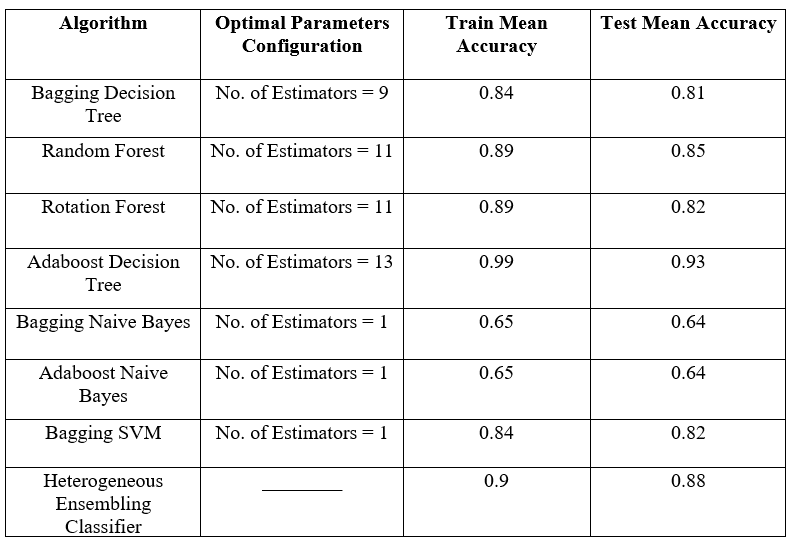

In [60]:
from IPython.display import Image
Image(filename='D:/Ensemble_Optimal_Parameters.png', width=550)

## Evaluating the Results:

Since most of the calssifiers performs well without overfitting there is space for further analysis to determine the best classifier. Inorder to be the best, the classifier performance should be balanced over all classes and it should be a fast learner. So in this section the time complexity(time taken to train the model and Classifying the new instances) of each classifier is compared along with by considering model specificity and sensitivity of each class in the process of determining the best classifier.

In [61]:
import time
Classifier_report=pd.DataFrame(columns=["Classifier","Training Time in Seconds","Train Accuracy","Test Accuracy"])

In [62]:
def get_trainining_time(clf,Algorithm):
    
    global Classifier_report
    train_data, test_data = letter_train, letter_test
    if "Naive Bayes" in Algorithm or Algorithm=="Rotation Forest":
        train_data, test_data = pc_data(letter_train,letter_test)
        
    start_time = time.clock()
    clf.fit(train_data,target_train)
    train_acc= round(clf.score(train_data,target_train),4)*100
    test_acc = round(clf.score(test_data,target_test),4)*100
    time_taken=time.clock() - start_time
    Classifier_report.loc[-1] = [Algorithm,time_taken,train_acc,test_acc]  # adding a row
    Classifier_report.index = Classifier_report.index + 1  # shifting index
    Classifier_report = Classifier_report.sort_index()  # sorting by index  

The above functtion is defined to calculate the time taken by a clasifier to train the model and classifying the Train and Test/Unseen data. The Accuracies of the model are also calculated and all of these information will be stored in the Classifier_report Dataframe. The information is stored in dataframe so that time complexity will be generated later to analyze the performance.

In [63]:
# Decision Tree
d_tree=tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=31,min_samples_leaf=15)
get_trainining_time(RandomForestClassifier(n_estimators=11,criterion='entropy',min_samples_split=31,min_samples_leaf=15),"Random Forest")
get_trainining_time(AdaBoostClassifier(base_estimator=d_tree,n_estimators=13),"Adaboost_DT")
get_trainining_time(RandomForestClassifier(n_estimators=11,criterion='entropy',min_samples_split=31,min_samples_leaf=15),"Rotation Forest")
get_trainining_time(BaggingClassifier(n_estimators=9,base_estimator=d_tree,max_samples=1.0,max_features=1.0),"Bagging_DT")

#Naive Bayes
nb=naive_bayes.GaussianNB()
get_trainining_time(BaggingClassifier(n_estimators=1,base_estimator=nb,max_samples=1.0,max_features=1.0),"Bagging_Naive Bayes")
get_trainining_time(AdaBoostClassifier(base_estimator=nb,n_estimators=1),"Adaboost_Naive Bayes")

#KNN
knn=neighbors.KNeighborsClassifier(n_neighbors=7)
get_trainining_time(knn,"KNN")

#Linear SVM
linear_svm=svm.SVC(decision_function_shape='ovr',kernel='linear',C=0.0106158)
get_trainining_time(linear_svm,"Linear SVM")
get_trainining_time(BaggingClassifier(n_estimators=1,base_estimator=linear_svm,max_samples=1.0,max_features=1.0),"Bagging_Linear SVM")

#Poly SVM
poly_svm=svm.SVC(decision_function_shape='ovr',kernel='poly',C=0.1,gamma=0.005,degree=4)
get_trainining_time(poly_svm,"Poly SVM")

#RBF/Guassian SVM
rbf_svm=svm.SVC(decision_function_shape='ovr',kernel='rbf',C=0.1,gamma=0.00377)

In [64]:
Classifier_report

,Classifier,Training Time in Seconds,Train Accuracy,Test Accuracy
0,Poly SVM,7.359830,94.76,92.02
1,Bagging_Linear SVM,5.676863,83.75,81.91
2,Linear SVM,9.000834,84.54,82.77
3,KNN,2.683961,96.69,93.97
4,Adaboost_Naive Bayes,0.298327,69.59,68.79
5,Bagging_Naive Bayes,0.152684,69.19,68.42
6,Bagging_DT,0.391238,85.27,82.08
7,Rotation Forest,2.118474,90.47,83.52
8,Adaboost_DT,1.453469,99.87,93.47
9,Random Forest,0.216651,89.93,85.61


In the next step the performances(accuracies) of the classifiers has to be checked for the statistical significant difference between them. So, Two tail Pair T test is conducted manually with  Null hypothesis is stated as there is no significant difference between the performances. And the results has rejected the Null Hypothesis at every instance inidicating that there is a significant difference between the classifier performances.

Text(0.5,1,'Traning time of Different Models')

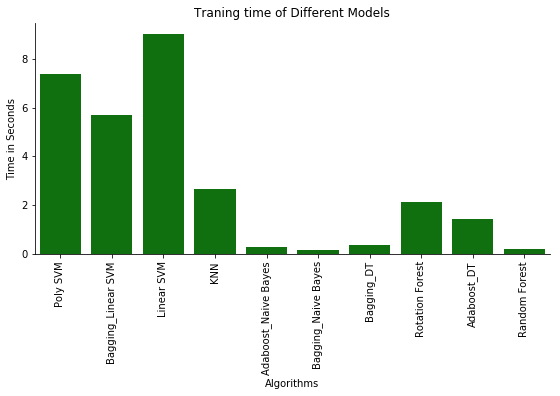

In [65]:
ax=sns.factorplot(x="Classifier",y="Training Time in Seconds",data=Classifier_report,kind="bar",aspect=2,size=4,color="green")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
plt.ylabel("Time in Seconds")
plt.title("Traning time of Different Models")

The time efficiency of the classifiers are visualized as above plot. Initially as the Poly SVM and KNN performs very well with the accuracy of 92% and 94% respectively, the idea behind analyzing the time plot is to find a classifier which is a quick learner and can be able to match the performances of KNN and Poly SVM after Ensembling is implemented. And the plot shows that the Ensembling Decision Tree and Naive Bayes significantly takes less time to train the model and classifying the instances. But Only Adaboost Decision Tree is able to match the performances of KNN and Poly SVM with an accuracy of 93%. Even though the performances of KNN, Adaboost DecisionTree are almost equal, Adaboost Decision tree is very time efficient in training the model i.e. quick learner. And also the Decision Tree doesn’t have any assumptions with respect to the Distribution of the data i.e. it doesn't require the normalizations,Transformations of the data. So before concluding Adaboost Decision Tree with 13 estimators as the best model, its performance on each class  will be validated by obtaining the Classification report on Train and Test Datasets.

### Classification Report

In [66]:
ada_dtree=AdaBoostClassifier(base_estimator=d_tree,n_estimators=7)
ada_dtree.fit(letter_train,target_train)
train_pred=ada_dtree.predict(letter_train)
test_pred=ada_dtree.predict(letter_test)

print("Classfication Report of Adaboost decision Tree on Test data")
print(classification_report(target_test,test_pred))

print("Classfication Report of Adaboost decision Tree on Train data")
print(classification_report(target_train,train_pred))

Classfication Report of Adaboost decision Tree on Test data
              precision    recall  f1-score   support

           A       0.98      0.97      0.98       260
           B       0.85      0.85      0.85       253
           C       0.93      0.91      0.92       243
           D       0.82      0.92      0.87       266
           E       0.87      0.88      0.87       254
           F       0.90      0.90      0.90       256
           G       0.87      0.90      0.89       255
           H       0.89      0.82      0.86       242
           I       0.97      0.92      0.95       249
           J       0.95      0.92      0.94       247
           K       0.81      0.89      0.85       244
           L       0.95      0.92      0.94       251
           M       0.93      0.92      0.93       261
           N       0.94      0.90      0.92       258
           O       0.91      0.86      0.88       249
           P       0.94      0.90      0.92       265
           Q       0.

## Conclusion & Future Work:

The classification report of Decision Tree shows that the model performs well and is balanced with respect to every class. Since Decision Tree is very efficient in every way, we are determining the Adaboost Decision Tree is the best Model to classify the Letters.
For the Future Work we want to see the performances of other Algorithms like Hidden Markov Models and other accuracy improving techniques like Deep Learning and Stacking. Along with this we also want to look for other metrics to compare the classifiers built for Multi class Problem.  

## Related Work:

[1] B V Sumana and T. Santhanam, “An Empirical Comparison of Ensemble and Hybrid Classification”, DOI: 03. AETS.2014.5.119
  https://pdfs.semanticscholar.org/17d6/d64202aeeeab07a09c3ff06cbee5f0632ce0.pdf
[2] Sadhana Tiwari, “Character Recognition using Ensemble classifier”, International Journal of Computer Science & Engineering Technology (IJCSET), ISSN: 2229-3345
  https://pdfs.semanticscholar.org/83fb/96314ed07c7fd0cedf17c2a692d10452ebb1.pdf
[3] Simon G¨unter and Horst Bunke,” Ensembles of Classifiers for Handwritten Word Recognition Specialized on Individual Handwriting Style”, S. Marinai and A. Dengel (Eds.): DAS 2004, LNCS 3163, pp. 286–297, 2004.
  https://link.springer.com/content/pdf/10.1007%2F978-3-540-286400_27.pdf
[4] Aytug Onan, Serdar Korukoglu , Hasan Bulut,” Ensemble of keyword extraction methods and classifiers in text classification”,2016
  https://www.sciencedirect.com/science/article/pii/S0957417416301464?via%3Dihub